<a href="https://colab.research.google.com/github/kha-iman972/Vivante-Khaya-Projects/blob/master/water_usage_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulated water usage data (daily, in liters)
data = {
    "Date": pd.date_range(start="2025-07-20", periods=10, freq="D"),
    "Total Water (L)": [120, 150, 160, 130, 140, 180, 170, 200, 190, 175],
    "Mushroom Beds (L)": [60, 70, 75, 65, 68, 85, 80, 95, 90, 88],
    "Greenhouse Plants (L)": [60, 80, 85, 65, 72, 95, 90, 105, 100, 87]
}

df = pd.DataFrame(data)
df["Day"] = df["Date"].dt.strftime("%b %d")
df.head()


,Date,Total Water (L),Mushroom Beds (L),Greenhouse Plants (L),Day
0,2025-07-20,120,60,60,Jul 20
1,2025-07-21,150,70,80,Jul 21
2,2025-07-22,160,75,85,Jul 22
3,2025-07-23,130,65,65,Jul 23
4,2025-07-24,140,68,72,Jul 24


/tmp/ipython-input-2-740033997.py:13: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


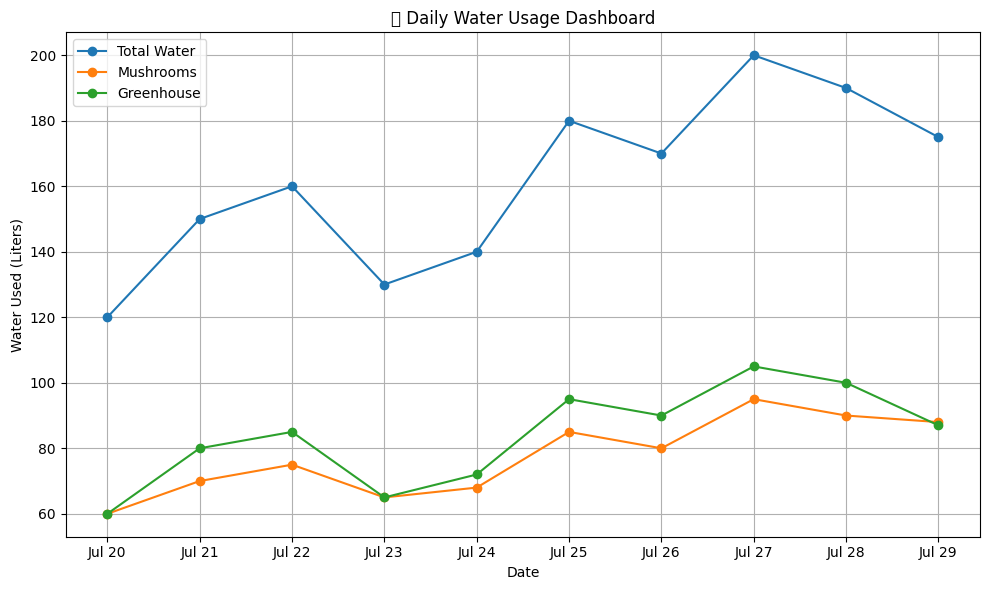

In [2]:
def plot_water_dashboard(df):
    plt.figure(figsize=(10, 6))

    plt.plot(df["Day"], df["Total Water (L)"], label="Total Water", marker="o")
    plt.plot(df["Day"], df["Mushroom Beds (L)"], label="Mushrooms", marker="o")
    plt.plot(df["Day"], df["Greenhouse Plants (L)"], label="Greenhouse", marker="o")

    plt.title("💧 Daily Water Usage Dashboard")
    plt.xlabel("Date")
    plt.ylabel("Water Used (Liters)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_water_dashboard(df)


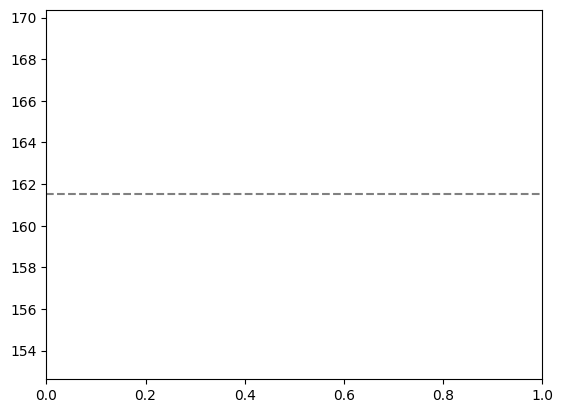

In [3]:
avg = df["Total Water (L)"].mean()
plt.axhline(y=avg, color="gray", linestyle="--", label=f"Avg: {avg:.1f} L")


/tmp/ipython-input-4-740033997.py:13: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


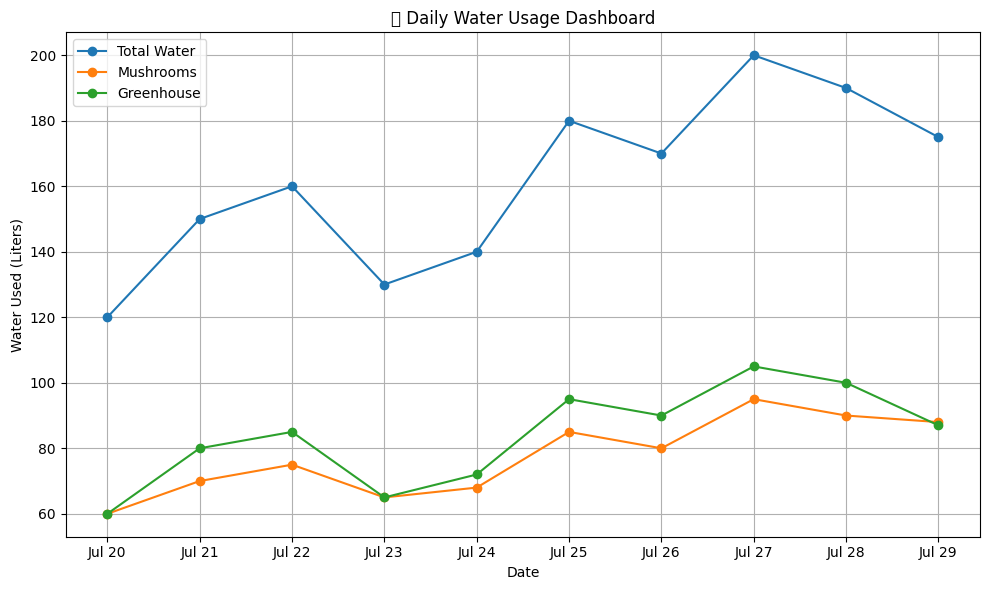

In [4]:
def plot_water_dashboard(df):
    plt.figure(figsize=(10, 6))

    plt.plot(df["Day"], df["Total Water (L)"], label="Total Water", marker="o")
    plt.plot(df["Day"], df["Mushroom Beds (L)"], label="Mushrooms", marker="o")
    plt.plot(df["Day"], df["Greenhouse Plants (L)"], label="Greenhouse", marker="o")

    plt.title("💧 Daily Water Usage Dashboard")
    plt.xlabel("Date")
    plt.ylabel("Water Used (Liters)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_water_dashboard(df)


In [5]:
!pip install pennylane


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 92.1 MB/s eta 0:00:00


In [6]:
import pennylane as qml
from pennylane import numpy as np

# Set up a quantum device
dev = qml.device("default.qubit", wires=1)

# Define a quantum node for optimization scoring
@qml.qnode(dev)
def water_optimizer(water_norm, mushroom_norm, plant_norm):
    qml.RY(water_norm * np.pi, wires=0)
    qml.RZ(mushroom_norm * np.pi, wires=0)
    qml.RY(plant_norm * np.pi, wires=0)
    return qml.expval(qml.PauliZ(0))

# Normalize helper function
def normalize(val, max_val):
    return min(val / max_val, 1)

# Create a column for efficiency score
def apply_quantum_scores(df):
    scores = []
    for i, row in df.iterrows():
        w = normalize(row["Total Water (L)"], 250)
        m = normalize(row["Mushroom Beds (L)"], 120)
        p = normalize(row["Greenhouse Plants (L)"], 150)
        q_score = 1 - (water_optimizer(w, m, p) + 1)/2  # Flip to 0 = efficient, 1 = wasteful
        scores.append(q_score)
    df["Quantum Score"] = scores
    return df


In [7]:
df = apply_quantum_scores(df)
df[["Day", "Total Water (L)", "Quantum Score"]]


,Day,Total Water (L),Quantum Score
0,Jul 20,120,0.490298
1,Jul 21,150,0.361448
2,Jul 22,160,0.286390
3,Jul 23,130,0.442816
4,Jul 24,140,0.403970
5,Jul 25,180,0.156115
6,Jul 26,170,0.216459
7,Jul 27,200,0.073605
8,Jul 28,190,0.108159
9,Jul 29,175,0.164746


/tmp/ipython-input-8-2697230568.py:9: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


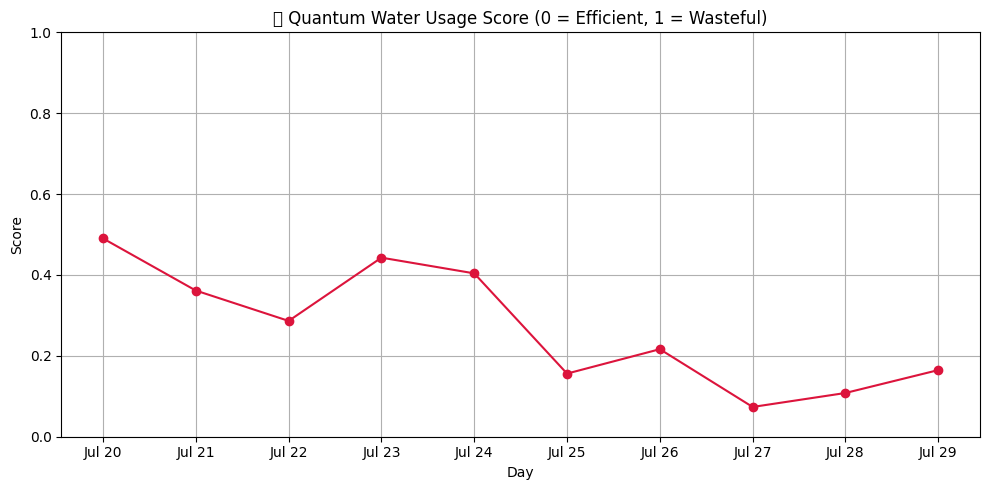

In [8]:
def plot_quantum_scores(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Day"], df["Quantum Score"], marker="o", color="crimson")
    plt.title("🔮 Quantum Water Usage Score (0 = Efficient, 1 = Wasteful)")
    plt.xlabel("Day")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_quantum_scores(df)


In [9]:
def plot_usage_and_scores(df):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot total water on left y-axis
    ax1.set_title("💧 Water Usage vs Quantum Risk")
    ax1.plot(df["Day"], df["Total Water (L)"], label="Total Water", color="blue", marker="o")
    ax1.set_ylabel("Water (L)", color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")

    # Plot quantum score on right y-axis
    ax2 = ax1.twinx()
    ax2.plot(df["Day"], df["Quantum Score"], label="Quantum Score", color="red", marker="x")
    ax2.set_ylabel("Risk Score", color="red")
    ax2.tick_params(axis='y', labelcolor="red")

    # Average line for water
    avg_water = df["Total Water (L)"].mean()
    ax1.axhline(y=avg_water, color="gray", linestyle="--", linewidth=1)
    ax1.text(0.5, avg_water + 5, f"Avg: {avg_water:.0f} L", color="gray")

    fig.tight_layout()
    plt.show()


/tmp/ipython-input-9-3338736386.py:21: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


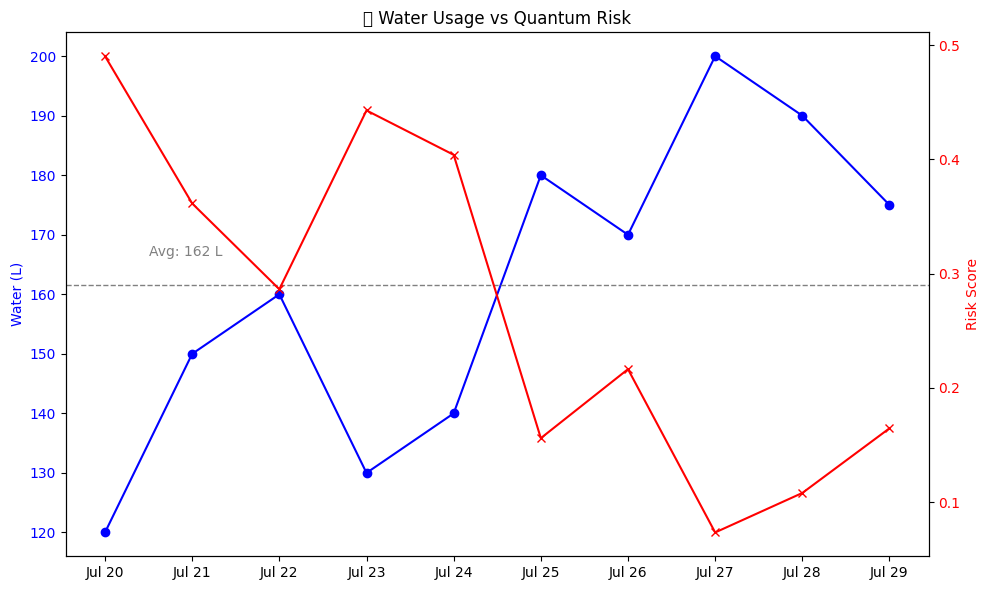

In [10]:
plot_usage_and_scores(df)


In [11]:
def display_alert_table(df, threshold=0.6):
    print(f"🚨 Days with Quantum Score > {threshold} (wasteful):\n")
    alerts = df[df["Quantum Score"] > threshold]
    if alerts.empty:
        print("✅ No wasteful days detected.")
    else:
        display(alerts[["Day", "Total Water (L)", "Quantum Score"]])


In [12]:
display_alert_table(df)


🚨 Days with Quantum Score > 0.6 (wasteful):

✅ No wasteful days detected.


In [13]:
def pie_chart_distribution(df):
    avg_mushroom = df["Mushroom Beds (L)"].mean()
    avg_greenhouse = df["Greenhouse Plants (L)"].mean()
    labels = ["Mushroom Beds", "Greenhouse"]
    values = [avg_mushroom, avg_greenhouse]

    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct="%1.1f%%", colors=["gold", "lightgreen"])
    plt.title("🌱 Average Water Use by Area")
    plt.show()


In [14]:
sensor_data = pd.DataFrame({
    "Date": pd.date_range("2025-07-20", periods=5).repeat(2),
    "Zone": ["Mushrooms", "Greenhouse"] * 5,
    "Flow Rate (L/min)": [2.5, 3.0, 2.8, 2.9, 3.2, 2.6, 2.4, 2.9, 2.7, 2.5],
    "Duration (min)": [30, 40, 25, 35, 40, 30, 45, 38, 33, 31]
})
sensor_data["Water Used (L)"] = sensor_data["Flow Rate (L/min)"] * sensor_data["Duration (min)"]
sensor_data.to_csv("/mnt/data/simulated_water_monitoring.csv", index=False)
sensor_data.head()


OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [15]:
sensor_data = pd.DataFrame({
    "Date": pd.date_range("2025-07-20", periods=5).repeat(2),
    "Zone": ["Mushrooms", "Greenhouse"] * 5,
    "Flow Rate (L/min)": [2.5, 3.0, 2.8, 2.9, 3.2, 2.6, 2.4, 2.9, 2.7, 2.5],
    "Duration (min)": [30, 40, 25, 35, 40, 30, 45, 38, 33, 31]
})
sensor_data["Water Used (L)"] = sensor_data["Flow Rate (L/min)"] * sensor_data["Duration (min)"]
sensor_data.to_csv("/mnt/data/simulated_water_monitoring.csv", index=False)
sensor_data.head()


OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [16]:
import pandas as pd
import random

# Create 7 days of irrigation data for two zones
dates = pd.date_range("2025-07-23", periods=7)
zones = ["Mushrooms", "Greenhouse"]

rows = []
for date in dates:
    for zone in zones:
        flow = round(random.uniform(2.3, 3.3), 2)
        duration = random.randint(25, 45)
        water_used = round(flow * duration, 2)
        rows.append([date.strftime("%Y-%m-%d"), zone, flow, duration, water_used])

# Build the DataFrame
df = pd.DataFrame(rows, columns=[
    "Date", "Zone", "Flow Rate (L/min)", "Duration (min)", "Water Used (L)"
])

# Preview it
df.head()


,Date,Zone,Flow Rate (L/min),Duration (min),Water Used (L)
0,2025-07-23,Mushrooms,2.99,28,83.72
1,2025-07-23,Greenhouse,3.27,38,124.26
2,2025-07-24,Mushrooms,2.64,29,76.56
3,2025-07-24,Greenhouse,2.83,39,110.37
4,2025-07-25,Mushrooms,2.84,41,116.44


In [17]:
df.to_csv("water_monitoring.csv", index=False)


In [18]:
# Group data by date and zone
summary = df.groupby(["Date", "Zone"])["Water Used (L)"].sum().unstack(fill_value=0)

# Add total daily water usage
summary["Total Water (L)"] = summary.sum(axis=1)

# Reset index to make it a clean table again
summary = summary.reset_index()
summary.head()


Zone,Date,Greenhouse,Mushrooms,Total Water (L)
0,2025-07-23,124.26,83.72,207.98
1,2025-07-24,110.37,76.56,186.93
2,2025-07-25,130.50,116.44,246.94
3,2025-07-26,73.78,71.24,145.02
4,2025-07-27,86.40,79.80,166.20


/tmp/ipython-input-19-2479187554.py:19: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


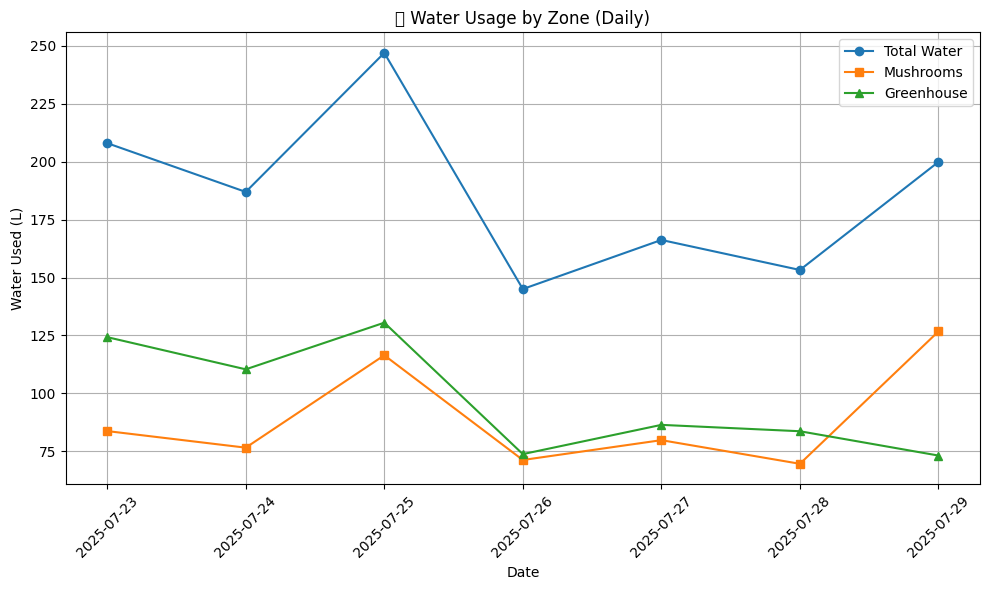

In [19]:
import matplotlib.pyplot as plt

def plot_water_usage(df):
    plt.figure(figsize=(10, 6))

    plt.plot(df["Date"], df["Total Water (L)"], label="Total Water", marker="o")

    if "Mushrooms" in df.columns:
        plt.plot(df["Date"], df["Mushrooms"], label="Mushrooms", marker="s")
    if "Greenhouse" in df.columns:
        plt.plot(df["Date"], df["Greenhouse"], label="Greenhouse", marker="^")

    plt.title("💧 Water Usage by Zone (Daily)")
    plt.xlabel("Date")
    plt.ylabel("Water Used (L)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function
plot_water_usage(summary)


In [20]:
import pennylane as qml
from pennylane import numpy as np

# Simulated qubit device
dev = qml.device("default.qubit", wires=1)

# Quantum scoring circuit
@qml.qnode(dev)
def water_risk_circuit(total_norm, mushroom_norm, greenhouse_norm):
    qml.RY(total_norm * np.pi, wires=0)
    qml.RZ(mushroom_norm * np.pi, wires=0)
    qml.RY(greenhouse_norm * np.pi / 2, wires=0)
    return qml.expval(qml.PauliZ(0))  # Output range: -1 to +1

# Helper to normalize values
def normalize(val, max_val):
    return min(val / max_val, 1)


In [21]:
def apply_quantum_scores(df):
    scores = []
    for i, row in df.iterrows():
        total = normalize(row["Total Water (L)"], 250)
        mush = normalize(row.get("Mushrooms", 0), 150)
        green = normalize(row.get("Greenhouse", 0), 150)

        score = 1 - (water_risk_circuit(total, mush, green) + 1)/2  # Convert -1..1 to 0..1
        scores.append(score)

    df["Quantum Score"] = scores
    return df


In [22]:
summary = apply_quantum_scores(summary)
summary[["Date", "Total Water (L)", "Quantum Score"]]


Zone,Date,Total Water (L),Quantum Score
0,2025-07-23,207.98,0.570912
1,2025-07-24,186.93,0.630881
2,2025-07-25,246.94,0.586957
3,2025-07-26,145.02,0.615720
4,2025-07-27,166.20,0.618608
5,2025-07-28,153.25,0.651915
6,2025-07-29,199.88,0.610770


/tmp/ipython-input-23-2268367217.py:9: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


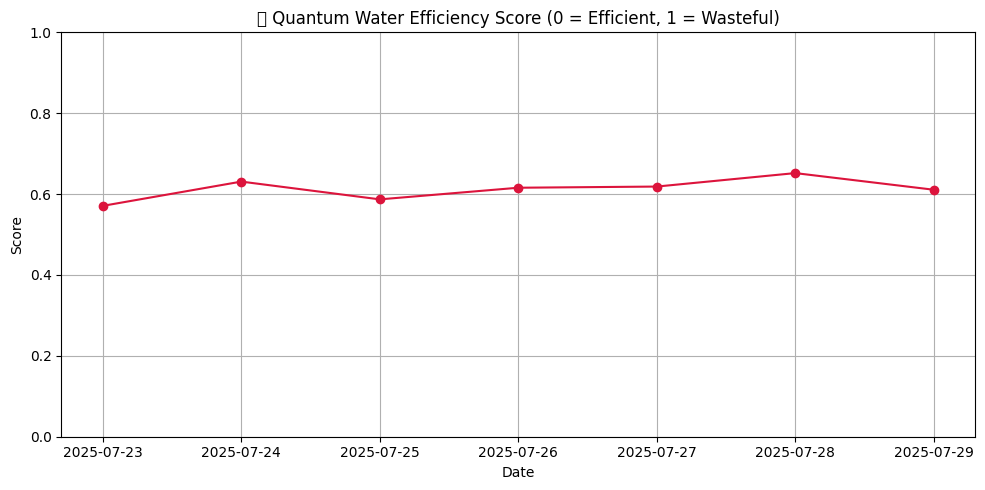

In [23]:
def plot_quantum_water_scores(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Date"], df["Quantum Score"], marker="o", color="crimson")
    plt.title("🔮 Quantum Water Efficiency Score (0 = Efficient, 1 = Wasteful)")
    plt.xlabel("Date")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_quantum_water_scores(summary)


/tmp/ipython-input-23-2268367217.py:9: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


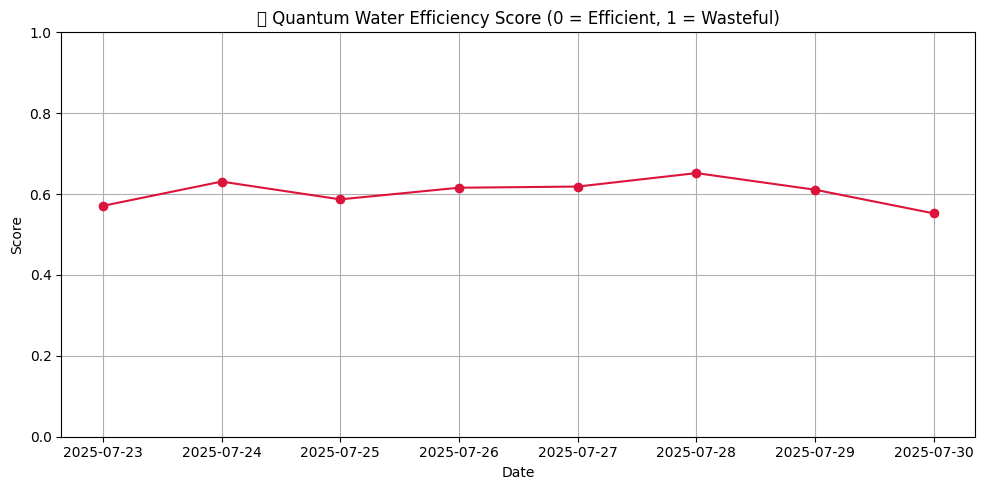

In [24]:
# Add an overuse entry (Mushrooms: high duration)
from datetime import datetime, timedelta

wasteful_day = {
    "Date": (datetime.strptime(summary["Date"].iloc[-1], "%Y-%m-%d") + timedelta(days=1)).strftime("%Y-%m-%d"),
    "Mushrooms": 180,  # Way above normal
    "Greenhouse": 140,
    "Total Water (L)": 320
}

summary.loc[len(summary)] = wasteful_day

# Recalculate quantum scores
summary = apply_quantum_scores(summary)
plot_quantum_water_scores(summary)


/tmp/ipython-input-23-2268367217.py:9: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


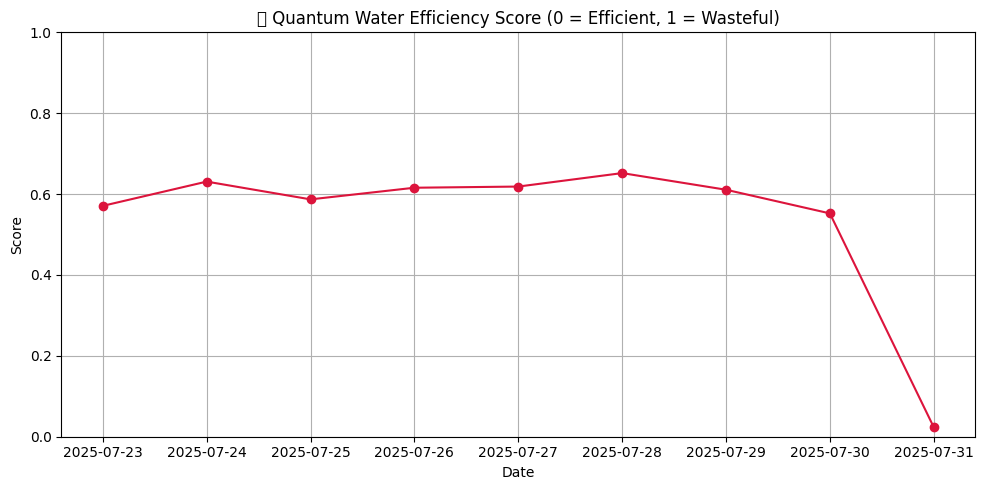

In [25]:
drought_day = {
    "Date": (datetime.strptime(summary["Date"].iloc[-1], "%Y-%m-%d") + timedelta(days=1)).strftime("%Y-%m-%d"),
    "Mushrooms": 10,
    "Greenhouse": 8,
    "Total Water (L)": 18
}

summary.loc[len(summary)] = drought_day
summary = apply_quantum_scores(summary)
plot_quantum_water_scores(summary)


/tmp/ipython-input-23-2268367217.py:9: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


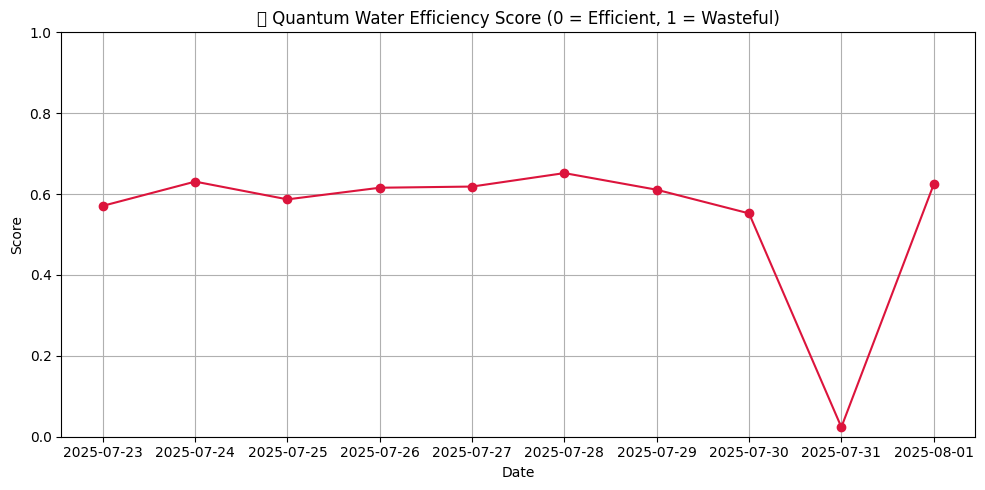

In [26]:
perfect_day = {
    "Date": (datetime.strptime(summary["Date"].iloc[-1], "%Y-%m-%d") + timedelta(days=1)).strftime("%Y-%m-%d"),
    "Mushrooms": 70,
    "Greenhouse": 75,
    "Total Water (L)": 145
}

summary.loc[len(summary)] = perfect_day
summary = apply_quantum_scores(summary)
plot_quantum_water_scores(summary)


In [27]:
print("👋 Welcome! Upload your CSV or generate data, then run rank + plot functions.")


👋 Welcome! Upload your CSV or generate data, then run rank + plot functions.


In [28]:
# 💧 Water Usage Dashboard (With Quantum Optimization)
This tool lets you monitor water usage across zones, simulate risk scores, and test irrigation scenarios.
Use it to prevent waste, detect underuse, and balance resources effectively.


SyntaxError: invalid syntax (ipython-input-28-2546045965.py, line 2)

# 💧 Water Usage Dashboard (With Quantum Optimization)
This tool lets you monitor water usage across zones, simulate risk scores, and test irrigation scenarios.
Use it to prevent waste, detect underuse, and balance resources effectively.


In [29]:
readme_text = """
# 💧 Water Usage Dashboard with Quantum Optimization

This tool allows farm teams to track water usage by zone (e.g., Mushrooms, Greenhouse), visualize trends, simulate scenarios, and optimize efficiency using quantum-inspired risk scoring (via PennyLane).

---

## 📦 Features

- Simulated or sensor-based water monitoring
- Daily zone-based water usage summaries
- Quantum-inspired risk score (0 = efficient, 1 = wasteful)
- Scenario testing (overuse, drought, ideal)
- Visualization of total usage and efficiency over time

---

## 🧠 How Quantum Scoring Works

Each day is scored using a simulated qubit circuit:
- Inputs: Total water, mushrooms, greenhouse
- Outputs: Score from 0 (efficient) to 1 (wasteful)

---

## 🔧 Setup Instructions

1. Open the notebook in [Google Colab](https://colab.research.google.com/)
2. Run the cells in order
3. (Optional) Upload or generate water data
4. Run visualization and scoring functions

---

## 📁 File Overview

- `water_dashboard.ipynb` — Main notebook
- `requirements.txt` — Python packages
- `simulated_water_monitoring.csv` — Sample data

---

## 📜 License

MIT License — free to use and modify with attribution.
"""

# Save it
with open("README.md", "w") as file:
    file.write(readme_text)

print("✅ README.md created.")


✅ README.md created.


In [30]:
requirements = """
pandas
matplotlib
pennylane
"""

# Save it
with open("requirements.txt", "w") as file:
    file.write(requirements.strip())

print("✅ requirements.txt created.")


✅ requirements.txt created.


In [31]:
from google.colab import files
files.download("README.md")
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>